# Diabete Mellitus

In [1]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt

## load_diabetes

In [2]:
diabetes = load_diabetes()

print(type(diabetes))

<class 'sklearn.utils._bunch.Bunch'>


### load_diabetes 속성 출력

In [3]:
for attr in dir(diabetes):
    if not attr.startswith('_'): print(attr)

DESCR
data
data_filename
data_module
feature_names
frame
target
target_filename


- **data**: (442, 10) 크기의 ndarray, 입력값
- **target**: (442,) 크기의 ndarray, 타깃
- **feature_names**: data의 각 열의 특징 이름
- **frame**: (442, 11) 크기의 데이터 프레임 (호출할 때 인자로 받은 as_frame=True일 때만 접근 가능)
- **DESCR**: 데이터셋의 설명
  - **Attribute Information**:
    - age: 연령
    - sex: 성별
    - bmi: 체질량 지수
    - bp: 평균 혈압
    - s1: tc, T-Cells (백혈구의 일종)
    - s2: ldl, 저밀도 지질단백질
    - s3: hdl, 고밀도 지질단백질
    - s4: tch, 갑상선 자극 호르몬
    - s5: ltg, 라모트리진
- **data_filename**: data의 위치 경로
- **target_filename**: target의 위치 경로


### 속성 중 data, freature_names, target 선택

In [5]:
data, target, freatuer_names = diabetes.data, diabetes.target, diabetes.feature_names
print(f'{data.shape = }, {target.shape = }')
print(f'{len(freatuer_names) = }')

data.shape = (442, 10), target.shape = (442,)
len(freatuer_names) = 10


## 훈련 데이터와 테스트 데이터 분할

In [6]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, 
                                                    test_size=0.2, random_state=11)

In [7]:
print(f'X train shape : {X_train.shape}')
print(f'y train shape : {y_train.shape}')
print(f'X test shape : {X_test.shape}')
print(f'y test shape : {y_test.shape}')

X train shape : (353, 10)
y train shape : (353,)
X test shape : (89, 10)
y test shape : (89,)


## DecisionTreeRegressor 모델 생성

In [8]:
model = DecisionTreeRegressor()

### DecisionTreeRegressor 모델 속성 출력

In [9]:
for attr in dir(model):
    if not attr.startswith('_'): print(attr)

apply
ccp_alpha
class_weight
cost_complexity_pruning_path
criterion
decision_path
feature_importances_
fit
get_depth
get_metadata_routing
get_n_leaves
get_params
max_depth
max_features
max_leaf_nodes
min_impurity_decrease
min_samples_leaf
min_samples_split
min_weight_fraction_leaf
predict
random_state
score
set_fit_request
set_params
set_predict_request
set_score_request
splitter


### 모델 훈련

In [10]:
model.fit(X_train, y_train)

print(f'depth = {model.get_depth()}\nget_n_leaves = {model.get_n_leaves()}')

depth = 17
get_n_leaves = 345


### 테스트 데이터에 대한 정확도 계산

In [11]:
accuracy = model.score(X_test, y_test) # R-squared 값을 반환하는 메서드
print(f'{accuracy = }')

accuracy = 0.11833979475242073


### R-squared(결정계수) 구하기

In [12]:
prediction = model.predict(X_test)
mean_y = np.mean(y_test)
SS_res = np.sum((y_test - prediction) ** 2)
SS_tot = np.sum((y_test - mean_y) ** 2)
R_square = 1 - (SS_res/SS_tot)
print(f'{R_square = }')

R_square = 0.11833979475242073


### 각 feature 별 정확도 분석

In [13]:
feature_accuracies = {}                                             # 각 특징별 정확도를 저장할 딕셔너리

for i, feature in enumerate(diabetes.feature_names):
    X_train_feature = X_train[:, i].reshape(-1, 1)                  # 현재 특징에 해당하는 열만 선택하여 2차원 배열로 변환
    X_test_feature = X_test[:, i].reshape(-1, 1)                    # 현재 특징에 해당하는 열만 선택하여 2차원 배열로 변환

    model_feature = DecisionTreeRegressor()                         # 특징별로 새로운 모델 생성
    model_feature.fit(X_train_feature, y_train)                     # 해당 특징을 사용하여 모델 훈련
    accuracy_feature = model_feature.score(X_test_feature, y_test)  # 해당 특징에 대한 테스트 데이터 정확도 계산

    feature_accuracies[feature] = accuracy_feature                  # 딕셔너리에 특징과 정확도 저장


### 결과 출력

In [14]:
for feature, accuracy in feature_accuracies.items():
    print(f'{feature}: {accuracy}')

age: -0.12745918049501204
sex: -0.003891179574224246
bmi: 0.2128411247836729
bp: 0.1977183684512519
s1: -0.24650634580142516
s2: -0.5546443325472816
s3: 0.2617907591231581
s4: 0.18673445830922408
s5: -0.1761600110078918
s6: 0.18462215981080443


각 특성별 정확도 분석:

- **age**: -0.127
  - 해당 특성은 모델의 예측에 부정적인 영향을 미칩니다.
- **sex**: -0.004
  - 해당 특성은 모델의 예측에 부정적인 영향을 미칩니다.
- **bmi**: 0.213
  - 해당 특성은 모델의 예측에 긍정적인 영향을 미칩니다.
- **bp**: 0.198
  - 해당 특성은 모델의 예측에 긍정적인 영향을 미칩니다.
- **s1**: -0.247
  - 해당 특성은 모델의 예측에 부정적인 영향을 미칩니다.
- **s2**: -0.555
  - 해당 특성은 모델의 예측에 부정적인 영향을 미칩니다.
- **s3**: 0.262
  - 해당 특성은 모델의 예측에 긍정적인 영향을 미칩니다. (고밀도 지질단백질)
- **s4**: 0.187
  - 해당 특성은 모델의 예측에 긍정적인 영향을 미칩니다.
- **s5**: -0.176
  - 해당 특성은 모델의 예측에 부정적인 영향을 미칩니다.
- **s6**: 0.185
  - 해당 특성은 모델의 예측에 긍정적인 영향을 미칩니다.


### 그래프 그리기

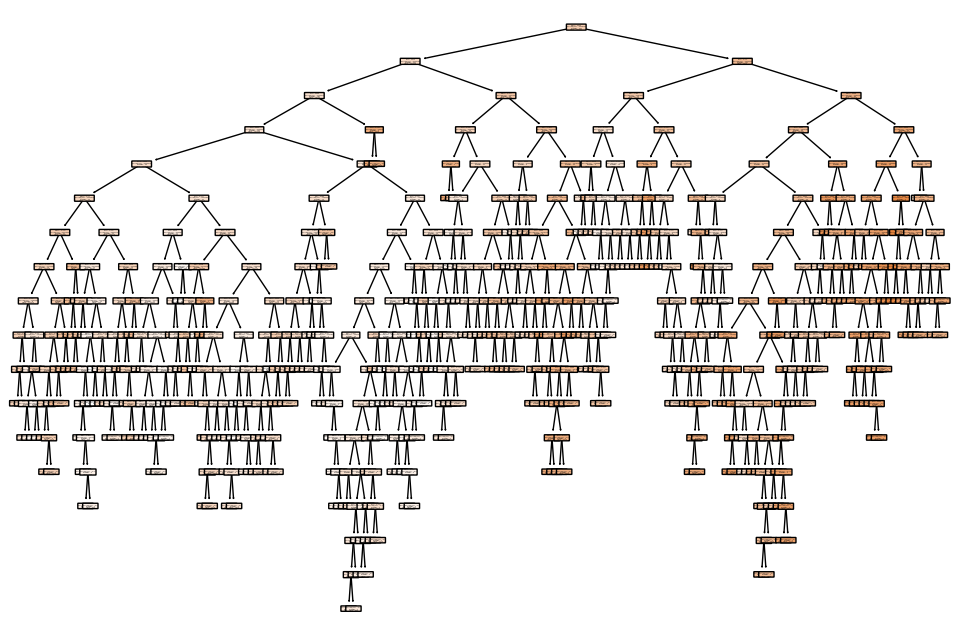

In [15]:
plt.figure(figsize=(12, 8))
tree.plot_tree(model, 
               feature_names=diabetes.feature_names,
               filled=True, rounded=True)
plt.show()

## Decision Tree 결과 분석

1. **모델의 구조**
   - 트리의 깊이(depth): depth = 17  
     - 트리가 17단계까지 깊게 분할 되었음을 의미한다. 상대적으로 깊은 편이며, 훈련 데이터에 대해 높은 정확도를 달성 할 수 있지만, 너무 깊은 트리는 과적합의 가능성이 높아지고, 새로운 데이터에 대한 일반화 성능이 저하될 수 있다.
   - 리프 노드의 개수(get_n_leaves): get_n_leaves = 345
     - 리프 노드의 개수가 비교적 적은편이다. 리프 노트의 개수는 모델의 복잡도를 나타내는 지표이며, 모델이 단순하고 일반화하기 쉬울 수 있다는 것을 의미한다.

2. **모델 정확도**
   - R-squared(결정계수): accuracy = 0.16141098330802728
     - R_square = 0.16141098330802728
     - 모델의 테스트 데이터의 변동이 약 16.14% 정도라고 설명할 수 있다. 이는 매우 낮은 예측 정확도를 보였다라고 할 수 있으며, 낮은 정확도는 모델이 주어진 데이터에 대하 부적절할 게 fitting 되었거나, 다른 요소들이 중요한 영향을 미치지 않았을 수 있다는 것을 알 수 있다.

3. **모델 총평**
   - 주어진 결과는 모델이 과적합 가능성이 낮고, 주어진 데이터에 대해 적절한 설명력을 가지지 못하는 모델이다.
   - 모델 수정이 필요할 수 있다.
